In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
from sklearn.datasets import fetch_olivetti_faces  # 머신러닝 lib
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import numpy as np

df = pd.read_spss('/content/drive/MyDrive/sample_data/한국복지패널2019.sav')
df = df.rename(columns={'h14_g3' : '성별', 'h14_g4': '출생연도', 'h14_g10' :'결혼 유무', 'h14_g11' : '종교' ,'p1402_8aq1' : '급여', 'h14_eco9' :'직업코드', 'h14_reg7': '지역코드'})
df = df.loc[:,['성별', '출생연도', '결혼 유무', '종교', '급여', '직업코드', '지역코드']]

df['나이'] = (2019.0 - df['출생연도']) + 1

df['성별'] = np.where(df['성별']== 1.0 , '남자','여자')

df = df.assign(나이구간 = np.where(df['나이']<30,'청년', np.where(df['나이']<=45,'중년', np.where(df['나이']<=64,'장년' , '노인'))))

list_job = pd.read_excel('/content/drive/MyDrive/sample_data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

# inplace = True 바뀐 컬럼을 바로 적용시킨다
list_job.rename(columns={'code_job':'직업코드','job':'직업'},inplace=True)

df = df.merge(list_job, how = 'left', on = '직업코드')

df

,성별,출생연도,결혼 유무,종교,급여,직업코드,지역코드,나이,나이구간,직업
0,여자,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,노인,NaN
1,남자,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,노인,NaN
2,남자,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,노인,전기공
3,남자,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,장년,금속기계 부품 조립원
4,여자,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,장년,NaN
...,...,...,...,...,...,...,...,...,...,...
14413,여자,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,장년,NaN
14414,여자,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,청년,NaN
14415,남자,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,청년,건설 및 광업 단순 종사자
14416,여자,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,청년,보건 의료 관련 종사자


In [29]:
df['종교'].value_counts()

2.0    7815
1.0    6603
Name: 종교, dtype: int64

In [30]:
import numpy as np
import seaborn as sns

df['종교'] = np.where(df['종교'] == 1 ,'있음','없음')
df['종교'].value_counts()

없음    7815
있음    6603
Name: 종교, dtype: int64

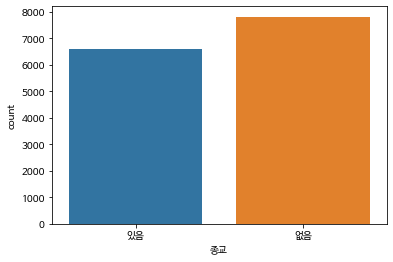

In [31]:
sns.countplot(data = df, x = '종교')

In [32]:
df['결혼 유무'].value_counts()
#0 비 해당 18세 미만
#1 기혼
#2 사별
#3 이혼
#4 별거
#5 미혼
#6 기타

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: 결혼 유무, dtype: int64

In [33]:
# df['결혼여부'] = 
# # np.where(df['결혼 유무'] == 0 , '미성년',
#                       np.where(df['결혼 유무'] == 1, '기혼',
#                               #  np.where(df['결혼 유무'] == 2, '사별', 
#                                         np.where(df['결혼 유무'] == 3, '이혼',
#                                                 #  np.where(df['결혼 유무'] == 4, '별거',
#                                                           np.where(df['결혼 유무'] == 5, '미혼','기타')))

df['결혼여부'] = np.where(df['결혼 유무'] == 1, '기혼', np.where(df['결혼 유무'] == 3, '이혼','기타'))             

df['결혼여부']

0        기타
1        기타
2        이혼
3        기혼
4        기혼
         ..
14413    기혼
14414    기타
14415    기타
14416    기타
14417    기타
Name: 결혼여부, Length: 14418, dtype: object

In [34]:
marri_stat = df.groupby('결혼여부', as_index=False).agg(cnt=('결혼여부','count'))
marri_stat

,결혼여부,cnt
0,기타,6539
1,기혼,7190
2,이혼,689


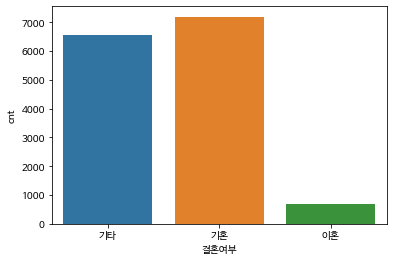

In [35]:
sns.barplot(data = marri_stat, x = '결혼여부',y= 'cnt')

In [12]:
# pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# rel_div = df.query('결혼여부 != "기타"').groupby('결혼여부',as_index=False).agg(수=('결혼여부','count'))
rel_div = df.query('결혼여부 != "기타"').groupby('종교',as_index=False)['결혼여부'].value_counts(normalize = True)
rel_div

,종교,결혼여부,proportion
0,없음,기혼,0.905045
1,없음,이혼,0.094955
2,있음,기혼,0.920469
3,있음,이혼,0.079531


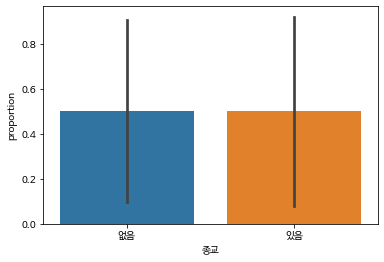

In [22]:
sns.barplot(data=rel_div, x = '종교',y = 'proportion')

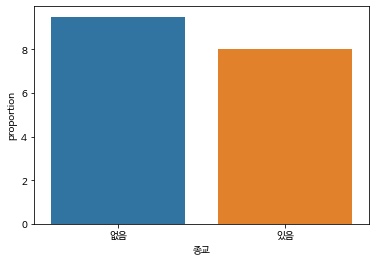

In [26]:
rel_div = rel_div.query('결혼여부 == "이혼"').assign(proportion = rel_div['proportion']*100).round(1)
sns.barplot(data=rel_div, x = '종교',y = 'proportion')

In [36]:
# 연령대 종교 유무에 따른 이혼율 
age_div = df.query('결혼여부 !="기타"').groupby('나이구간', as_index = False)['결혼여부'].value_counts(normalize=True)
age_div

,나이구간,결혼여부,proportion
0,노인,기혼,0.931090
1,노인,이혼,0.068910
2,장년,기혼,0.866983
3,장년,이혼,0.133017
4,중년,기혼,0.966731
5,중년,이혼,0.033269
6,청년,기혼,0.950000
7,청년,이혼,0.050000


In [43]:
age_rel_div = df.query('결혼여부 != "기타" & 나이구간 != "청년"').groupby(['나이구간','종교'], as_index = False)['결혼여부'].value_counts(normalize = True)
age_rel_div

,나이구간,종교,결혼여부,proportion
0,노인,없음,기혼,0.924890
1,노인,없음,이혼,0.075110
2,노인,있음,기혼,0.935949
3,노인,있음,이혼,0.064051
4,장년,없음,기혼,0.850215
5,장년,없음,이혼,0.149785
6,장년,있음,기혼,0.884766
7,장년,있음,이혼,0.115234
8,중년,없음,기혼,0.965381
9,중년,없음,이혼,0.034619


In [44]:
age_rel_div =  age_rel_div.query('결혼여부 =="이혼"').assign(proportion = age_rel_div['proportion']*100).round(1)
age_rel_div

,나이구간,종교,결혼여부,proportion
1,노인,없음,이혼,7.5
3,노인,있음,이혼,6.4
5,장년,없음,이혼,15.0
7,장년,있음,이혼,11.5
9,중년,없음,이혼,3.5
11,중년,있음,이혼,3.1


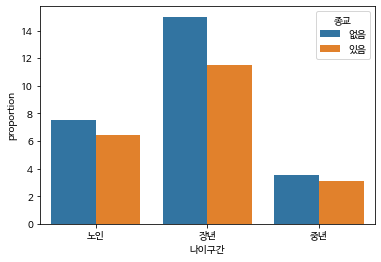

In [45]:
sns.barplot(data=age_rel_div, x = '나이구간' , y = 'proportion' ,hue = '종교')